In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Admission_Predict2.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [11]:
df.drop(columns = ['Serial No.'] ,inplace = True)

# Use min max scaling when lower and upper bound is known


In [14]:
x = df.iloc[: , : -1]
y = df.iloc[: ,-1]

In [15]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [17]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [36]:
model  = Sequential()

model.add(Dense(7 , activation = 'relu' , input_dim = 7))
model.add(Dense(7 , activation = 'relu'))
model.add(Dense(1 , activation = 'linear'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss = 'mean_squared_error' , optimizer = 'Adam' , metrics = ['accuracy'])

In [39]:
history = model.fit(x_train_scaled , y_train , epochs  = 100 , validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 0.1350 - accuracy: 0.0000e+00 - val_loss: 0.0953 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0621 - accuracy: 0.0000e+00 - val_loss: 0.0415 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.0000e+00 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0255 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0201 - accuracy: 0.0000e+00 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.0000e+00 - 

In [40]:
y_pred=  model.predict(x_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [41]:
from sklearn.metrics import r2_score

r2_score(y_test , y_pred)

0.7264783940155614

In [42]:
import matplotlib.pyplot as plt

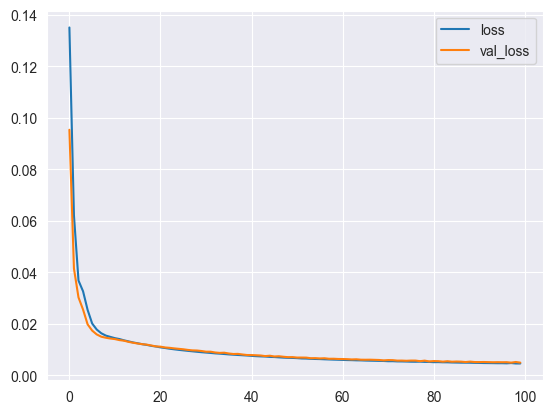

In [49]:
plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()